# Programa para aquisição de imagens

   ###                                          imports

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np


import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import MiniBatchSparsePCA


## Aquisição de imagens 

In [10]:
# For para aquisição de todas as figuras

L = []                       #Lista onde serão guardadas todas as figuras

img = cv2.imread('img18/Pura.png') #Imagem Simples (sem heatmap) tamanho original 700x1000
imgReduzida =  cv2.resize(img,(700,1000),interpolation=cv2.INTER_AREA)    #Imagem simples reduzida


for i in range (1,42):       #Imagens com Heatmap
    imgAux = cv2.imread('img18/'+ str(i)+ '.png')
    L.append(cv2.subtract(img,imgAux))
    L[i-1] = cv2.cvtColor(L[i-1], cv2.COLOR_BGR2GRAY)
    #L[i-1] = cv2.resize(L[i-1],(700,1000),interpolation=cv2.INTER_AREA)
    

## Imagem Binarizada

In [11]:
#TESTE PARA BINARIZAÇÃO DE IMAGEM
L=[]
for i in range (1,42):       #Imagens com Heatmap
    imgAux = cv2.imread('img18/'+ str(i)+ '.png')
    L.append(cv2.subtract(imgAux,img))
    L[i-1] = cv2.cvtColor(L[i-1], cv2.COLOR_BGR2GRAY)
    #(thresh, L[i-1]) = cv2.threshold(L[i-1], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    L[i-1] = cv2.threshold(L[i-1], 5, 255, cv2.THRESH_BINARY)[1]

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


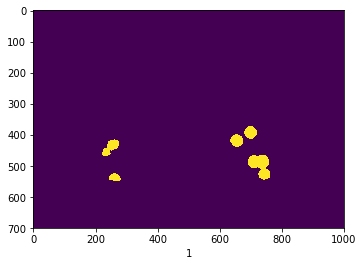

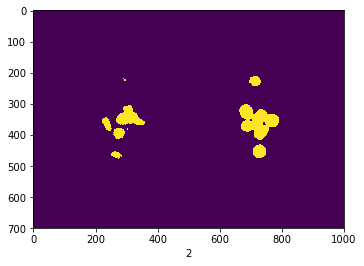

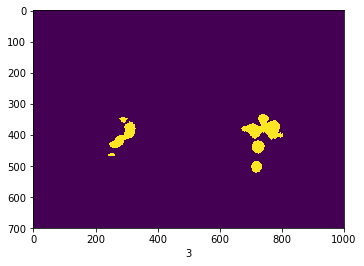

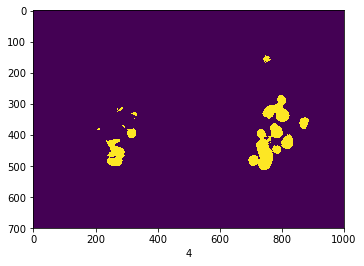

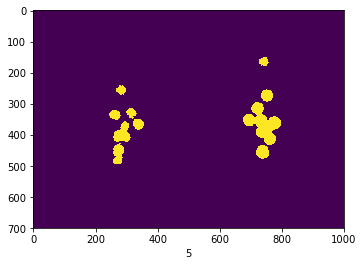

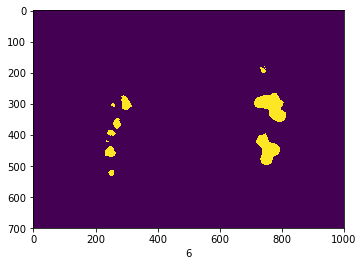

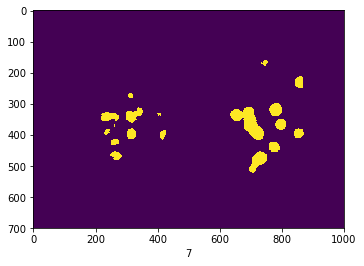

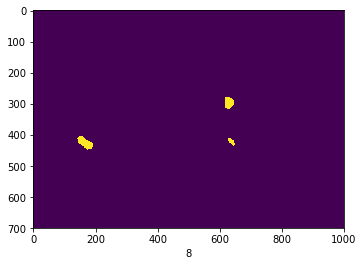

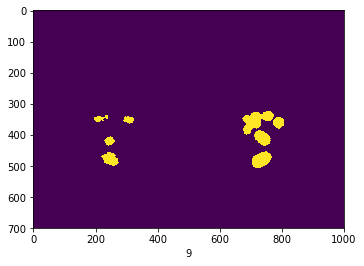

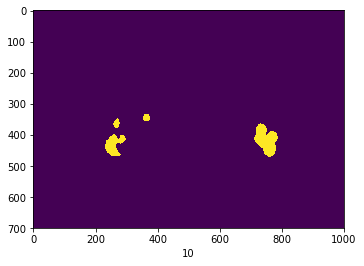

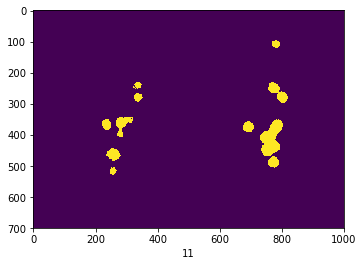

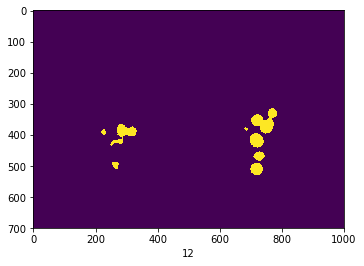

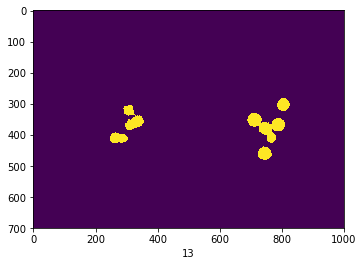

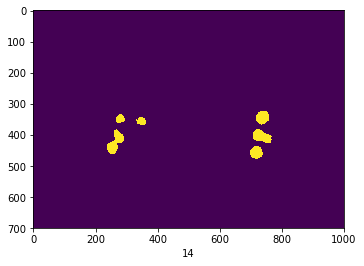

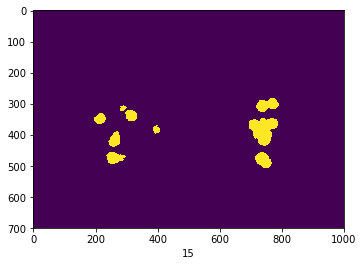

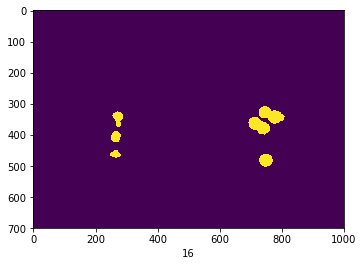

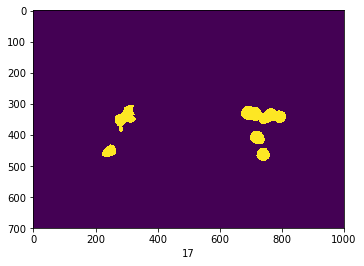

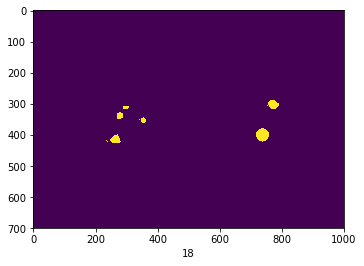

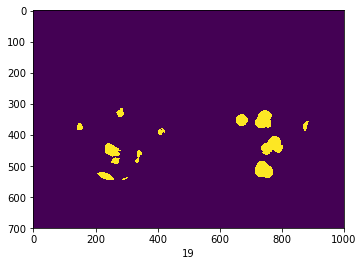

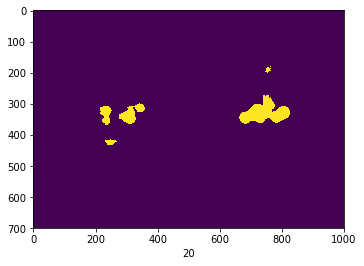

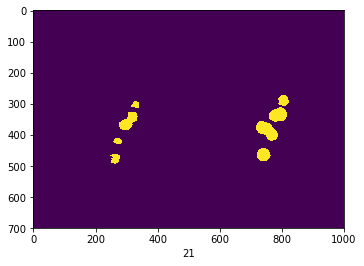

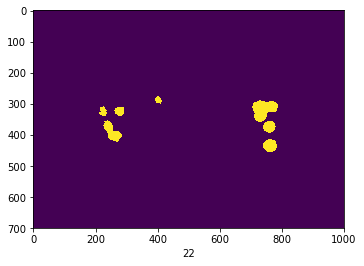

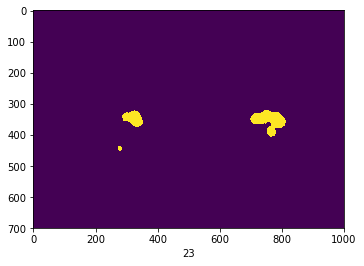

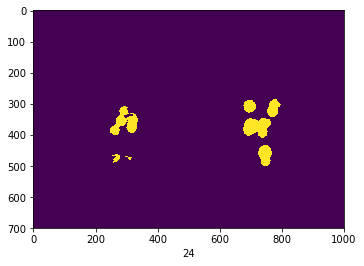

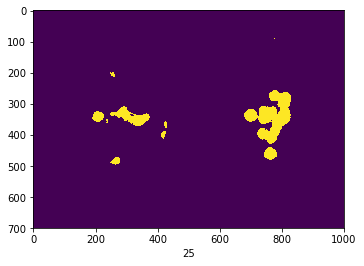

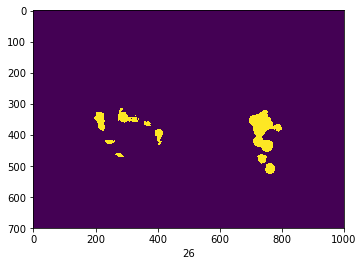

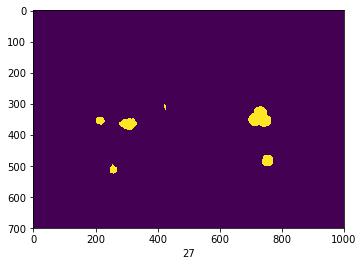

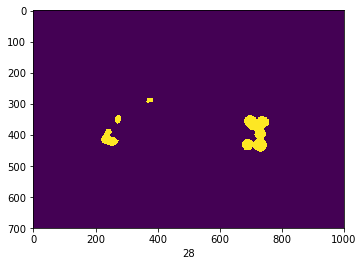

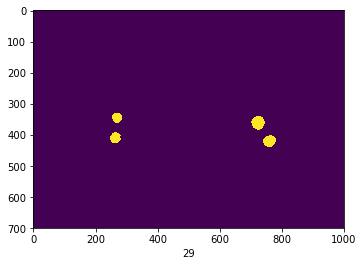

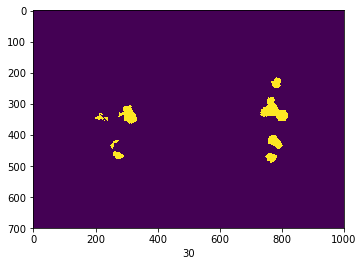

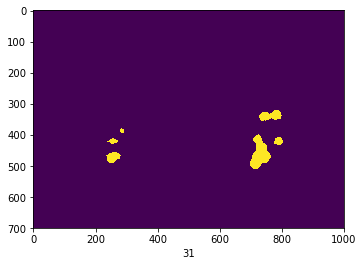

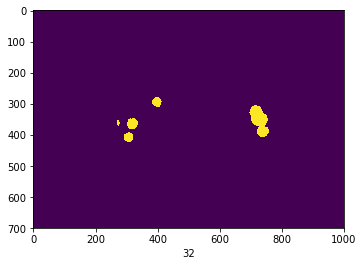

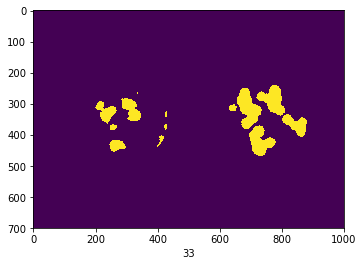

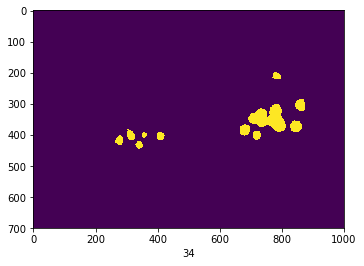

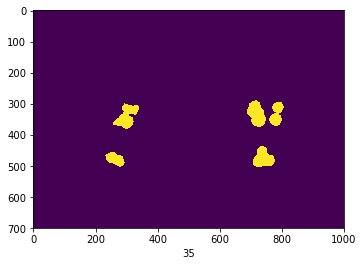

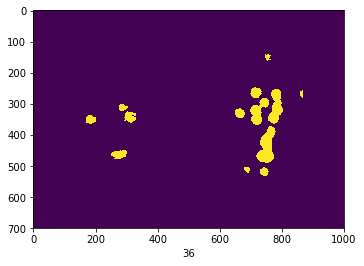

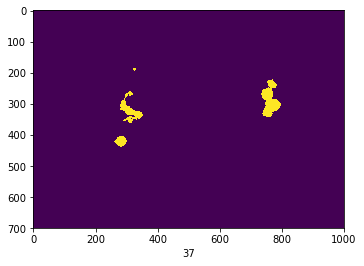

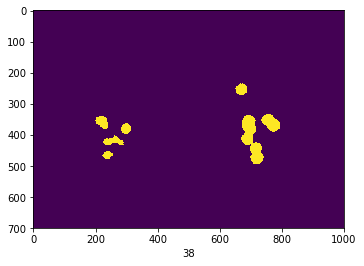

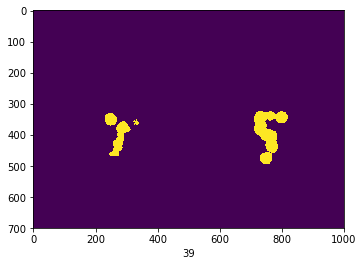

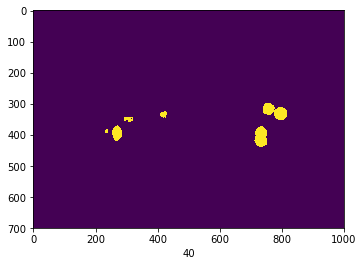

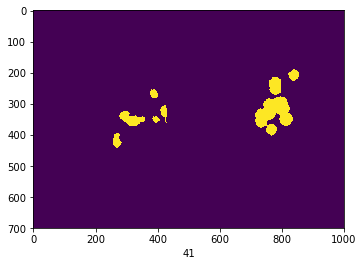

In [12]:
#Mostra todas as imagens do vetor L
for i in range (0,41):
    plt.figure()
    plt.xlabel(i+1)
    plt.imshow(L[i])

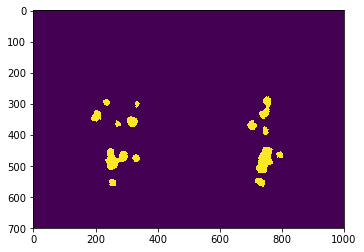

In [8]:
plt.figure()
fig = plt.imshow(L[3])

plt.savefig('HeatmapImg18_V4')

In [5]:
input('Qual a imagem que gostaria de ver?')

plt.imshow(cv2.subtract(img,np.array(L[i -1])))

Qual a imagem que gostaria de ver?3


error: C:\ci\opencv_1512688052760\work\modules\core\src\arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function cv::arithm_op


# Classificador

In [7]:
#Usado para classificar : L
L;

#Classficação dos dados:
Prof = (
1,1,4,1,1,1,1,0,4,1,
1,1,4,1,1,4,1,4,4,1,
4,1,4,1,1,1,1,1,1,1,
1,1,1,0,4,4,1,1,1,1,1)

#  ROLÊ monstro para transformar matrix de 3 dim em 2

In [13]:
Laux= []                   #Vetor que junta as dimensões da imagem em 2, porém ainda com 3 dimensões (uma dimensão fica 1)
for j in range (0,41):
    Laux.append(L[j].reshape(-1,1).T)
    
Laux2= []                  #Vetor que
for j in range (0,41):
    Laux2.append(Laux[j][0])

In [285]:
np.shape(Laux2)

(41, 700000)

# Pca

In [194]:
#PCA para TODAS as imagens de Laux2
L_pca = []               
pca = PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='full', tol=0.0, whiten=False).fit(Laux2)
L_pca = pca.fit_transform(Laux2)              

x = pca.explained_variance_ratio_.cumsum() #Apresenta a soma de variancia dos últimos valores do vetor
#Salva lista L_pca em um .csv:
np.savetxt("L_pca.csv", L_pca, delimiter=",")

#Mostra L_pca 
#L_pca
#soma de variancias (ultimo valor mostra variancia explicada nos dados)
x

array([ 0.08172418,  0.15228034,  0.20577958,  0.2550245 ,  0.30421039])

   # Set de treino e inferência
   
   ## Só com 2 quartis (péssimo e excelente):

In [97]:
#Prof
#Classficação dos dados só entre bom e ruim:
Prof = (3,2,4,3,3,1,1,0,4,3,2,3,4,1,1,4,2,4,4,1,4,3,4,2,2,3,1,3,2,1,2,2,1,0,4,4,2,1,3,3,1)
#-----------------------------------------------------------------------
#Retirar quartil 3,2 e 0 da lista:
L_pcaBxR=[] #nova lista de pca
ProfBxRcor=[] #nova lista de quartil
ProfBxR=[] #nova lista de quartil
ç=[]
for i in range(0,len(Prof)):
    if Prof[i]==1:
        ProfBxR.append(Prof[i])
        L_pcaBxR.append(L_pca[i])
        ProfBxRcor.append('red')
    if Prof[i]==2:
        ProfBxR.append(1)
        L_pcaBxR.append(L_pca[i])
        ProfBxRcor.append('red')
    if Prof[i]==3:
        ProfBxR.append(2)
        L_pcaBxR.append(L_pca[i])
        ProfBxRcor.append('green')
    if Prof[i]==4:
        ProfBxR.append(2)
        L_pcaBxR.append(L_pca[i])
        ProfBxRcor.append('green')

        
#Quantas imagens de L_pcaBxR deseja treinar? ps: Maximo 20
#------------------------------
r = 20
#------------------------------
L_pcaTreino = []
ProfTreino = []
for k in range(0,r):
    L_pcaTreino.append(L_pcaBxR[k])
    ProfTreino.append(ProfBxR[k])

#Resto de imagens para inferencia:
L_pcaInferencia = []
ProfInferencia = []
for k in range(r,len(ProfBxR)):
    L_pcaInferencia.append(L_pcaBxR[k])
    ProfInferencia.append(ProfBxR[k])
    

#Cross-Validation inverte treino com inferencia:
    
L_pcaTreinoCross = []
ProfTreinoCross = []
for k in range(r,len(ProfBxR)):
    L_pcaTreinoCross.append(L_pcaBxR[k])
    ProfTreinoCross.append(ProfBxR[k])

#Resto de imagens para inferencia:
L_pcaInferenciaCross = []
ProfInferenciaCross = []
for k in range(0,r):
    L_pcaInferenciaCross.append(L_pcaBxR[k])
    ProfInferenciaCross.append(ProfBxR[k])

print(ProfBxR)
print(ProfInferencia)
print(ProfInferenciaCross)

print(len(ProfBxR))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1]
[2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1]
[2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2]
39


### Gráficos

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


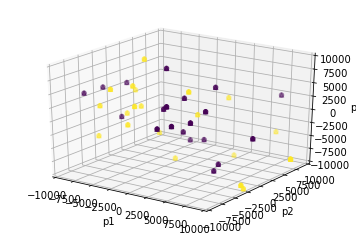

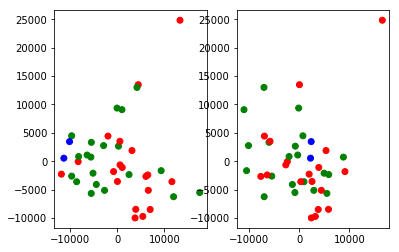

In [72]:
from mpl_toolkits.mplot3d import Axes3D

p1 = [i[0] for i in L_pca]

p2 = [i[1] for i in L_pca]

p3 = [i[2] for i in L_pca]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = p1
    ys = p2
    zs = p3
    ax.scatter(xs, ys, zs, c=ProfBxR, marker=m)
    ax.legend()
    ax.set_xlim(-10000, 10000)
    ax.set_ylim(-10000, 10000)
    ax.set_zlim(-10000, 10000)
    ax.set_xlabel('p1')
    ax.set_ylabel('p2')
    ax.set_zlabel('p3')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=25., azim=-55)


plt.show()


plt.figure()
plt.subplot(121)
plt.scatter(p1,p2,c=ProfBxRcor)

plt.subplot(122)
plt.scatter(p3,p2,c=ProfBxRcor)


## Com todos os quartis: 

In [88]:

#------------------------------------------------------------------------
#Classificado por quartil
Prof = (3,2,4,3,3,1,1,0,4,3,2,3,4,1,1,4,2,4,4,1,4,3,4,2,2,3,1,3,2,1,2,2,1,0,4,4,2,1,3,3,1)

#
#Quantas imagens de L_pca deseja treinar?
#------------------------------
r = 30
#------------------------------
L_pcaTreino = []
ProfTreino = []
for k in range(0,r):
    L_pcaTreino.append(L_pca[k])
    ProfTreino.append(Prof[k])

#Resto de imagens para inferencia:
L_pcaInferencia = []
ProfInferencia = []
for k in range(r,41):
    L_pcaInferencia.append(L_pca[k])
    ProfInferencia.append(Prof[k])

# Lda svd

In [96]:
clf = LinearDiscriminantAnalysis(n_components = 40, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.00000001)


clf.fit(L_pcaTreino, ProfTreino)  
acertadas = 0
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferencia[i-r], clf.predict(L_pcaInferencia[i-r])))
    if ProfInferencia[i-r] ==  clf.predict(L_pcaInferencia[i-r]):
        acertadas = acertadas + 1

        
print('Inferencias corretas: {}' .format(acertadas))
print('\n\n Inferencia do imagens já treinadas:\n')

for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreino[i], clf.predict(L_pcaTreino[i])))

print('\n\n\n Cross Validation\n\n\n')

clf.fit(np.array(L_pcaTreinoCross), ProfTreinoCross)
acertadas = 0
for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
    if np.array(ProfInferenciaCross[i]) ==  np.array(clf.predict(L_pcaInferenciaCross[i])):
        acertadas = acertadas + 1 
        
print('Inferencias corretas: {}' .format(acertadas))

print('\n\n Inferencia do imagens já treinadas:\n')
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

Figura 21: Valor correto = 2, inferido = [2]
Figura 22: Valor correto = 2, inferido = [2]
Figura 23: Valor correto = 2, inferido = [2]
Figura 24: Valor correto = 1, inferido = [2]
Figura 25: Valor correto = 1, inferido = [1]
Figura 26: Valor correto = 2, inferido = [2]
Figura 27: Valor correto = 1, inferido = [0]
Figura 28: Valor correto = 2, inferido = [1]
Figura 29: Valor correto = 1, inferido = [2]
Figura 30: Valor correto = 1, inferido = [1]
Figura 31: Valor correto = 1, inferido = [2]
Figura 32: Valor correto = 1, inferido = [2]
Figura 33: Valor correto = 1, inferido = [1]
Figura 34: Valor correto = 0, inferido = [2]
Figura 35: Valor correto = 2, inferido = [1]
Figura 36: Valor correto = 2, inferido = [2]
Figura 37: Valor correto = 1, inferido = [2]
Figura 38: Valor correto = 1, inferido = [1]
Figura 39: Valor correto = 2, inferido = [1]
Figura 40: Valor correto = 2, inferido = [1]
Figura 41: Valor correto = 1, inferido = [1]
Inferencias corretas: 10


 Inferencia do imagens já tr

D:\Anaconda\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:

# LDA lsqr

In [98]:

clf = LinearDiscriminantAnalysis(n_components =40, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=True, tol=0.01)


clf.fit(L_pcaTreino, ProfTreino)  
acertadas = 0
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferencia[i-r], clf.predict(L_pcaInferencia[i-r])))
    if ProfInferencia[i-r] ==  clf.predict(L_pcaInferencia[i-r]):
        acertadas = acertadas + 1

        
print('\n\n Inferencias corretas: {}' .format(acertadas))
print('\n\n Inferencia do imagens já treinadas:\n')

for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreino[i], clf.predict(L_pcaTreino[i])))

print('\n\n\n Cross Validation\n\n\n')

clf.fit(np.array(L_pcaTreinoCross), ProfTreinoCross)
acertadas = 0
for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
    if np.array(ProfInferenciaCross[i]) ==  np.array(clf.predict(L_pcaInferenciaCross[i])):
        acertadas = acertadas + 1 
        
print('\n\nInferencias corretas: {}' .format(acertadas))

print('\n\n Inferencia do imagens já treinadas:\n')
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

Figura 21: Valor correto = 2, inferido = [2]
Figura 22: Valor correto = 2, inferido = [1]
Figura 23: Valor correto = 1, inferido = [1]
Figura 24: Valor correto = 1, inferido = [1]
Figura 25: Valor correto = 2, inferido = [2]
Figura 26: Valor correto = 1, inferido = [2]
Figura 27: Valor correto = 2, inferido = [1]
Figura 28: Valor correto = 1, inferido = [1]
Figura 29: Valor correto = 1, inferido = [1]
Figura 30: Valor correto = 1, inferido = [1]
Figura 31: Valor correto = 1, inferido = [2]
Figura 32: Valor correto = 1, inferido = [1]
Figura 33: Valor correto = 2, inferido = [1]
Figura 34: Valor correto = 2, inferido = [1]
Figura 35: Valor correto = 1, inferido = [2]
Figura 36: Valor correto = 1, inferido = [1]
Figura 37: Valor correto = 2, inferido = [1]
Figura 38: Valor correto = 2, inferido = [1]
Figura 39: Valor correto = 1, inferido = [1]


 Inferencias corretas: 10


 Inferencia do imagens já treinadas:

Figura 1: Valor correto = 2, inferido = [2]
Figura 2: Valor correto = 1, infe

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\skle

# LDA eigen

In [27]:

clf = LinearDiscriminantAnalysis(n_components =40, priors=None, shrinkage='auto',
              solver='eigen', store_covariance=True, tol=0.01)


clf.fit(L_pcaTreino, ProfTreino)  
acertadas = 0
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferencia[i-r], clf.predict(L_pcaInferencia[i-r])))
    if ProfInferencia[i-r] ==  clf.predict(L_pcaInferencia[i-r]):
        acertadas = acertadas + 1

        
print('Inferencias corretas: {}' .format(acertadas))
print('\n\n Inferencia do imagens já treinadas:\n')

for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreino[i], clf.predict(L_pcaTreino[i])))

print('\n\n\n Cross Validation\n\n\n')

clf.fit(np.array(L_pcaTreinoCross), ProfTreinoCross)
acertadas = 0
for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
    if np.array(ProfInferenciaCross[i]) ==  np.array(clf.predict(L_pcaInferenciaCross[i])):
        acertadas = acertadas + 1 
        
print('Inferencias corretas: {}' .format(acertadas))

print('\n\n Inferencia do imagens já treinadas:\n')
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

Figura 21: Valor correto = 2, inferido = [2]
Figura 22: Valor correto = 2, inferido = [2]
Figura 23: Valor correto = 2, inferido = [1]
Figura 24: Valor correto = 1, inferido = [1]
Figura 25: Valor correto = 1, inferido = [1]
Figura 26: Valor correto = 2, inferido = [2]
Figura 27: Valor correto = 1, inferido = [2]
Figura 28: Valor correto = 2, inferido = [2]
Figura 29: Valor correto = 1, inferido = [2]
Figura 30: Valor correto = 1, inferido = [2]
Figura 31: Valor correto = 1, inferido = [2]
Figura 32: Valor correto = 1, inferido = [1]
Figura 33: Valor correto = 1, inferido = [2]
Figura 34: Valor correto = 1, inferido = [2]
Figura 35: Valor correto = 2, inferido = [2]
Figura 36: Valor correto = 2, inferido = [1]
Figura 37: Valor correto = 1, inferido = [2]
Figura 38: Valor correto = 1, inferido = [1]
Figura 39: Valor correto = 2, inferido = [2]
Figura 40: Valor correto = 2, inferido = [2]
Figura 41: Valor correto = 1, inferido = [2]
Inferencias corretas: 11


 Inferencia do imagens já tr

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\skle

# VSM

In [93]:
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=False, shrinking= False,
    tol=0.1, verbose=False)


clf.fit(L_pcaTreino, ProfTreino)  
acertadas = 0
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferencia[i-r], clf.predict(L_pcaInferencia[i-r])))
    if ProfInferencia[i-r] ==  clf.predict(L_pcaInferencia[i-r]):
        acertadas = acertadas + 1

        
print('Inferencias corretas: {}' .format(acertadas))
print('\n\n Inferencia do imagens já treinadas:\n')

for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreino[i], clf.predict(L_pcaTreino[i])))

print('\n\n\n Cross Validation\n\n\n')

clf.fit(np.array(L_pcaTreinoCross), ProfTreinoCross)
acertadas = 0
for i in range (0,r):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
    if np.array(ProfInferenciaCross[i]) ==  np.array(clf.predict(L_pcaInferenciaCross[i])):
        acertadas = acertadas + 1 
        
print('Inferencias corretas: {}' .format(acertadas))

print('\n\n Inferencia do imagens já treinadas:\n')
for i in range (r,len(ProfBxR)):
    print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

Figura 21: Valor correto = 2, inferido = [2]
Figura 22: Valor correto = 2, inferido = [2]
Figura 23: Valor correto = 2, inferido = [2]
Figura 24: Valor correto = 1, inferido = [1]
Figura 25: Valor correto = 1, inferido = [2]
Figura 26: Valor correto = 2, inferido = [2]
Figura 27: Valor correto = 1, inferido = [2]
Figura 28: Valor correto = 2, inferido = [1]
Figura 29: Valor correto = 1, inferido = [2]
Figura 30: Valor correto = 1, inferido = [2]
Figura 31: Valor correto = 1, inferido = [1]
Figura 32: Valor correto = 1, inferido = [2]
Figura 33: Valor correto = 1, inferido = [2]
Figura 34: Valor correto = 1, inferido = [1]
Figura 35: Valor correto = 2, inferido = [1]
Figura 36: Valor correto = 2, inferido = [2]
Figura 37: Valor correto = 1, inferido = [2]
Figura 38: Valor correto = 1, inferido = [1]
Figura 39: Valor correto = 2, inferido = [1]
Figura 40: Valor correto = 2, inferido = [1]
Figura 41: Valor correto = 1, inferido = [2]
Inferencias corretas: 9


 Inferencia do imagens já tre

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\Anaconda\lib\site-packages\skle

# Retorno da imagem

TypeError: Invalid dimensions for image data

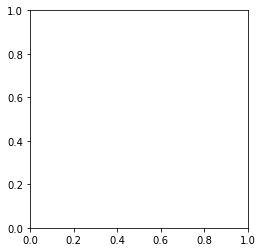

In [120]:
ImagemTransf = pca.inverse_transform(L_pca)
plt.imshow(np.array(ImagemTransf[3]))
plt.xlabel('Restored image n_components = 250')
#print 'Variance retained %s %%' %((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100)
#print 'Compression Ratio %s %%' %(float(size(coke_gray_pca)) / size(coke_gray) * 100)
plt.show()

In [121]:
np.size(ImagemTransf)

1793750

# Área de testes

In [61]:
x = [[1,2,3],[4,5,6],[7,8,9]]

In [191]:
L[0].reshape(-1,1).T

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
np.array(L).shape

(41, 175, 250)

In [44]:
np.array(L).reshape(175,250)

ValueError: cannot reshape array of size 1793750 into shape (175,250)

In [156]:
np.squeeze(Laux, axis = 0).reshape(-1,2).shape

(896875, 2)

In [38]:
u = np.array(L).reshape(-1,1)

np.shape(u)

(1793750, 1)

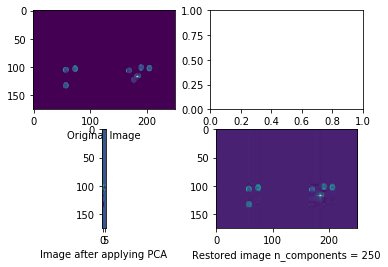

In [121]:

plt.figure()
#subplot(2, 2, 1)
plt.subplot(221)
plt.imshow(L[0])
plt.xlabel('Original Image')

#for i in range(1, 4):
plt.subplot(222)
n_comp = 5 ** i
pca = PCA(n_components = 6)
pca.fit(L[0])
coke_gray_pca = pca.fit_transform(L[0])


plt.subplot(223)
plt.imshow(coke_gray_pca)
plt.xlabel('Image after applying PCA')


coke_gray_restored = pca.inverse_transform(coke_gray_pca)
plt.subplot(224)
plt.imshow(coke_gray_restored)
plt.xlabel('Restored image n_components = 250')
#print 'Variance retained %s %%' %((1 - sum(pca.explained_variance_ratio_) / size(pca.explained_variance_ratio_)) * 100)
#print 'Compression Ratio %s %%' %(float(size(coke_gray_pca)) / size(coke_gray) * 100)
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: list index out of range

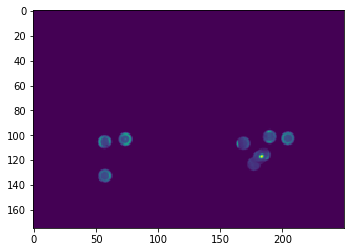

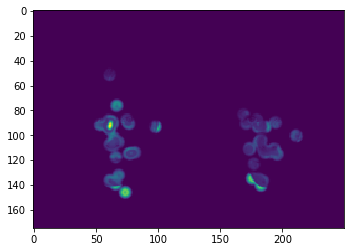

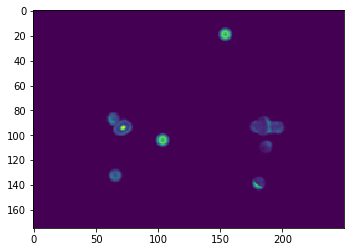

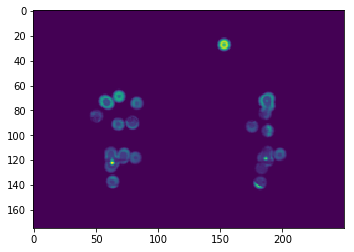

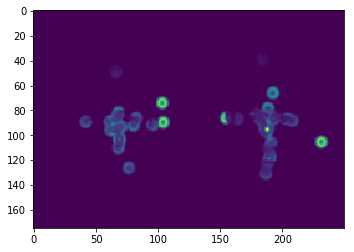

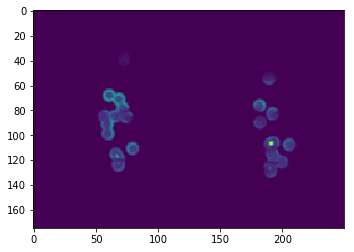

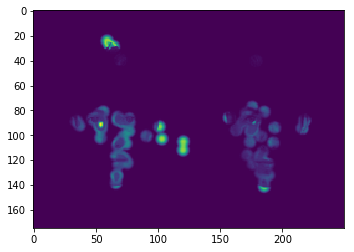

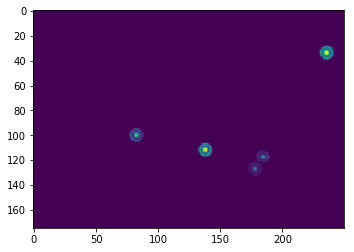

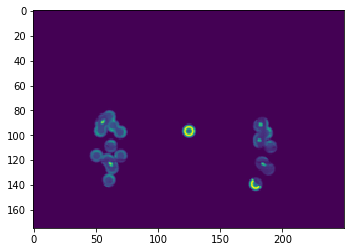

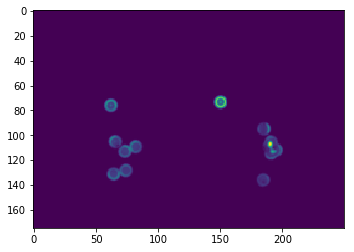

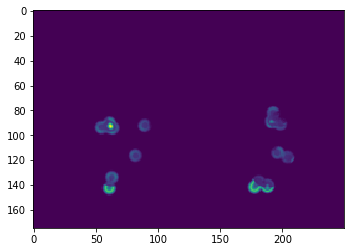

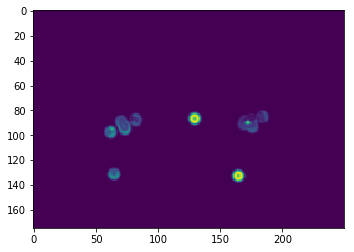

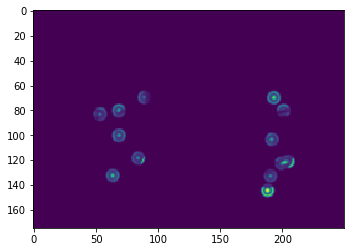

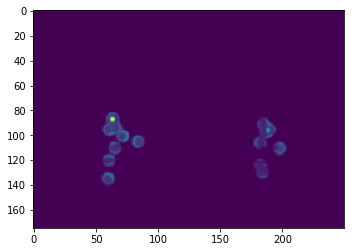

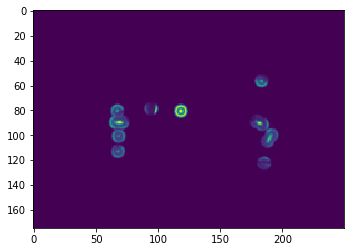

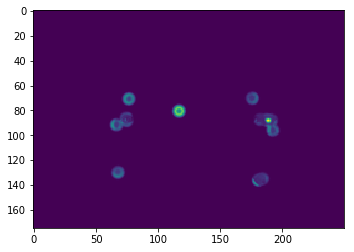

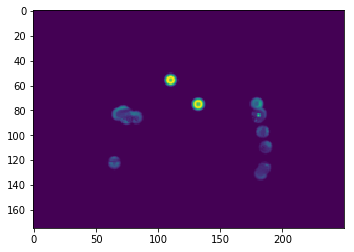

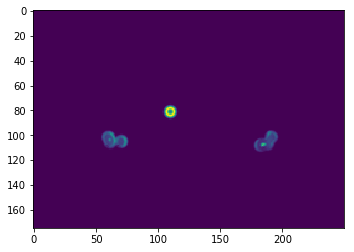

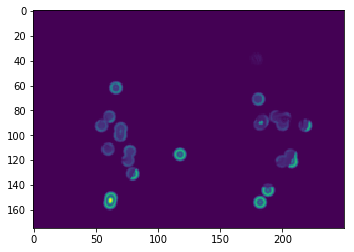

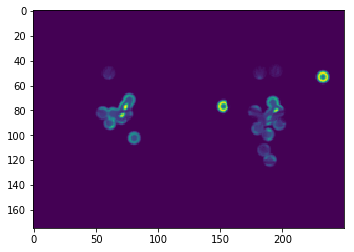

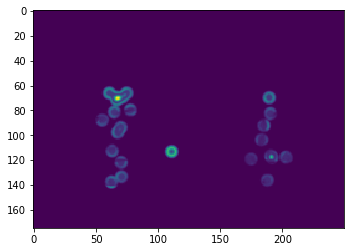

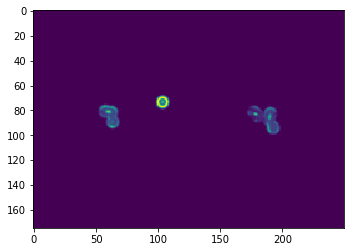

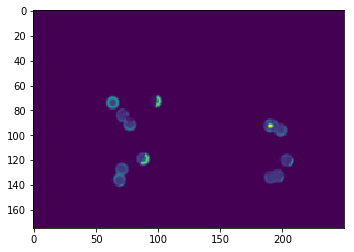

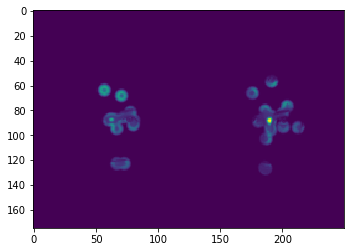

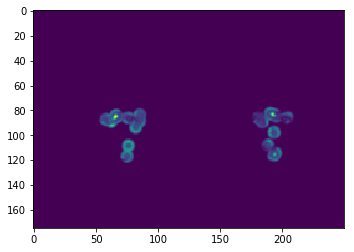

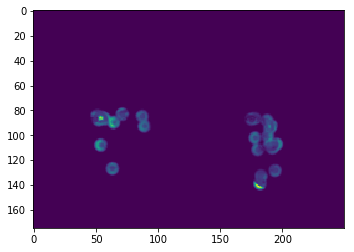

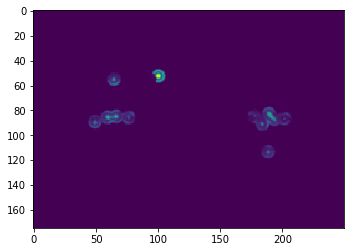

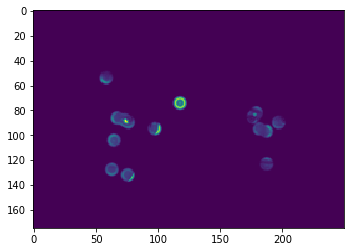

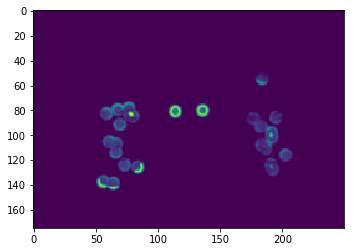

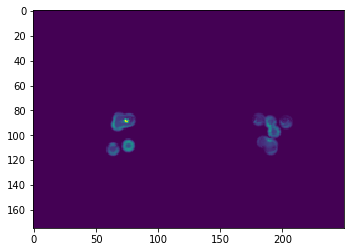

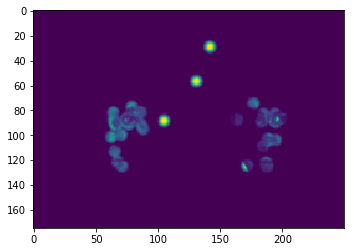

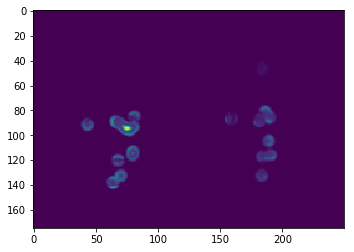

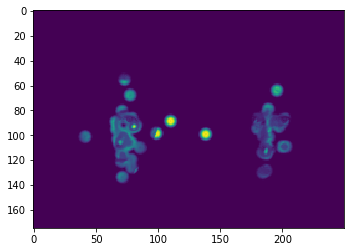

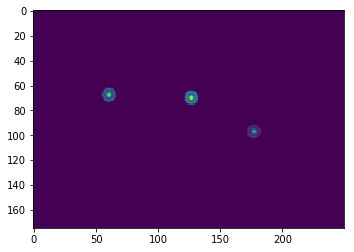

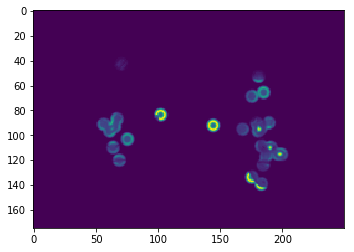

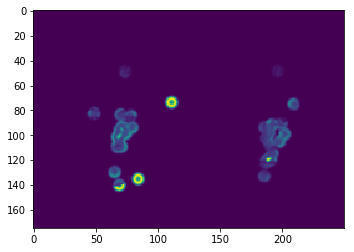

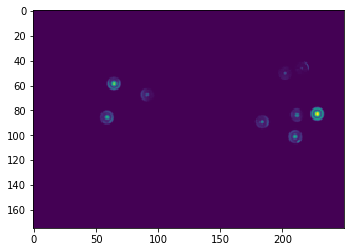

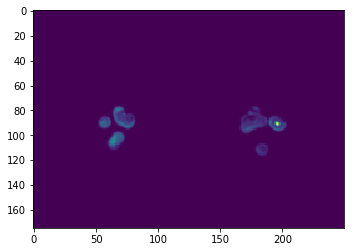

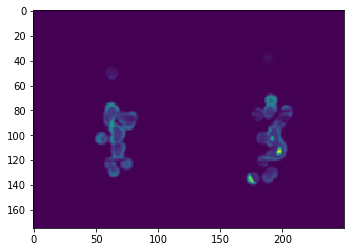

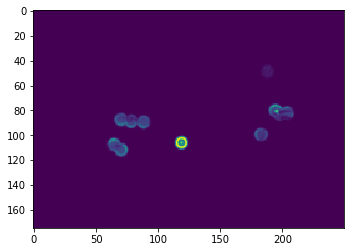

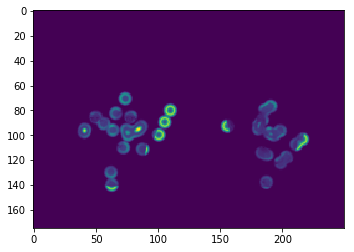

In [137]:
#Mostra todas as imagens do vetor L
for i in range (0,42):
    plt.figure()
    plt.imshow(Laux[i])

In [139]:
np.array(Laux).shape

(41, 175, 250)

# Código

In [14]:
Nnim=[]
AcertosS= []
AcertosC= []
AcertosC2=[]
AcertosC3=[]
for nim in range (1,2):
    #PCA para TODAS as imagens de Laux2
    L_pca = []               
    pca = PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
      svd_solver='full', tol=0.0, whiten=False).fit(Laux2)
    L_pca = pca.fit_transform(Laux2)              

    x = pca.explained_variance_ratio_.cumsum() #Apresenta a soma de variancia dos últimos valores do vetor
    

  
    
    #Classficação dos dados só entre bom e ruim:
    Prof = (3,2,4,3,3,1,1,0,4,3,2,3,4,1,1,4,2,4,4,1,4,3,4,2,2,3,1,3,2,1,2,2,1,0,4,4,2,1,3,3,1)
    #-----------------------------------------------------------------------
    
    #Retirar quartil 3,2 e 0 da lista:
    L_pcaBxR=[] #nova lista de pca
    ProfBxRcor=[] #nova lista de quartil
    ProfBxR=[] #nova lista de quartil
    LauxParaOrdenar = []
    
    for i in range(0,len(Prof)):
        if Prof[i]==1:
            ProfBxR.append(Prof[i])
            L_pcaBxR.append(L_pca[i])
            ProfBxRcor.append('red')
            LauxParaOrdenar.append(Laux2[i])
        if Prof[i]==2:
            ProfBxR.append(2)
            L_pcaBxR.append(L_pca[i])
            ProfBxRcor.append('red')
            LauxParaOrdenar.append(Laux2[i])
        if Prof[i]==3:
            ProfBxR.append(3)
            L_pcaBxR.append(L_pca[i])
            ProfBxRcor.append('red')
            LauxParaOrdenar.append(Laux2[i])
        if Prof[i]==4:
            ProfBxR.append(4)
            L_pcaBxR.append(L_pca[i])
            ProfBxRcor.append('green')
            LauxParaOrdenar.append(Laux2[i])
            
#-----------------------------------------------------------------------------------------            
    #Ordenar os dados:
    ProfOrdenado = []
    L_pcaOrdenado= []
    L_Ordenado = []
    for i in range(0,len(ProfBxR)):
            if ProfBxR[i] == 1:
                ProfOrdenado.append(ProfBxR[i])
                L_pcaOrdenado.append(L_pcaBxR[i])
                L_Ordenado.append(LauxParaOrdenar[i])
    for i in range(0,len(ProfBxR)):
            if ProfBxR[i] == 2:
                ProfOrdenado.append(ProfBxR[i])
                L_pcaOrdenado.append(L_pcaBxR[i])
                L_Ordenado.append(LauxParaOrdenar[i])
    for i in range(0,len(ProfBxR)):
            if ProfBxR[i] == 3:
                ProfOrdenado.append(ProfBxR[i])
                L_pcaOrdenado.append(L_pcaBxR[i])
                L_Ordenado.append(LauxParaOrdenar[i])
    for i in range(0,len(ProfBxR)):
            if ProfBxR[i] == 4:
                ProfOrdenado.append(ProfBxR[i])
                L_pcaOrdenado.append(L_pcaBxR[i])
                L_Ordenado.append(LauxParaOrdenar[i])
    
    
    #np.savetxt("L_OrdenadoTODOSimg35.csv", L_Ordenado, delimiter=",")
    np.savetxt("L_pcaOrdenadoimg35.csv", L_pcaOrdenado, delimiter=",")
    np.savetxt("ProfOrdenadoimg35.csv", ProfOrdenado, delimiter=",")
#-------------------------------------------------------------------------------------------
    
#     #Quantas imagens de L_pcaBxR deseja treinar? ps: Maximo 20
#     #------------------------------
#     r = 10
#     #------------------------------
#     L_pcaTreino = []
#     ProfTreino = []
#     for k in range(0,r):
#         L_pcaTreino.append(L_pcaBxR[k])
#         ProfTreino.append(ProfBxR[k])

#     #Resto de imagens para inferencia:
#     L_pcaInferencia = []
#     ProfInferencia = []
#     for k in range(r,len(ProfBxR)):
#         L_pcaInferencia.append(L_pcaBxR[k])
#         ProfInferencia.append(ProfBxR[k])


#     #Cross-Validation inverte treino com inferencia:

#     L_pcaTreinoCross = []
#     ProfTreinoCross = []
#     for k in range(r,len(ProfBxR)):
#         L_pcaTreinoCross.append(L_pcaBxR[k])
#         ProfTreinoCross.append(ProfBxR[k])

#     #Resto de imagens para inferencia:
#     L_pcaInferenciaCross = []
#     ProfInferenciaCross = []
#     for k in range(0,r):
#         L_pcaInferenciaCross.append(L_pcaBxR[k])
#         ProfInferenciaCross.append(ProfBxR[k])
     
#     #Cross-Validation DOIS embaralha os dois treinos:

#     L_pcaTreinoCross2 = []
#     ProfTreinoCross2 = []
#     for k in range(0,len(ProfBxR),2):
#         L_pcaTreinoCross2.append(L_pcaBxR[k])
#         ProfTreinoCross2.append(ProfBxR[k])

#     #Resto de imagens para inferencia:
#     L_pcaInferenciaCross2 = []
#     ProfInferenciaCross2 = []
#     for k in range(1,len(ProfBxR),2):
#         L_pcaInferenciaCross2.append(L_pcaBxR[k])
#         ProfInferenciaCross2.append(ProfBxR[k])

        
#     #Cross-Validation TRES embaralha os dois treinos:

#     L_pcaTreinoCross3 = []
#     ProfTreinoCross3 = []
#     for k in range(1,len(ProfBxR),2):
#         L_pcaTreinoCross3.append(L_pcaBxR[k])
#         ProfTreinoCross3.append(ProfBxR[k])

#     #Resto de imagens para inferencia:
#     L_pcaInferenciaCross3 = []
#     ProfInferenciaCross3 = []
#     for k in range(0,len(ProfBxR),2):
#         L_pcaInferenciaCross3.append(L_pcaBxR[k])
#         ProfInferenciaCross3.append(ProfBxR[k])



#         #LDA:
        
        
#     clf = LinearDiscriminantAnalysis(n_components =40, priors=None, shrinkage=None,
#                   solver='lsqr', store_covariance=True, tol=0.01)

#     Nnim.append(nim)
#     clf.fit(L_pcaTreino, ProfTreino)  
#     acertadas = 0
#     for i in range (r,len(ProfBxR)):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferencia[i-r], clf.predict(L_pcaInferencia[i-r])))
#         if ProfInferencia[i-r] ==  clf.predict(L_pcaInferencia[i-r]):
#             acertadas = acertadas + 1

#     AcertosS.append(acertadas)
#     #print('\n\n Inferencias corretas: {}' .format(acertadas))
#     #print('\n\n Inferencia do imagens já treinadas:\n')

#     #for i in range (0,r):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreino[i], clf.predict(L_pcaTreino[i])))

#     #print('\nCross Validation\n')

#     clf.fit(np.array(L_pcaTreinoCross), ProfTreinoCross)
#     acertadas = 0
#     for i in range (0,r):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
#         if np.array(ProfInferenciaCross[i]) ==  np.array(clf.predict(L_pcaInferenciaCross[i])):
#             acertadas = acertadas + 1 

#     #print('Inferencias corretas: {}\n' .format(acertadas))
#     AcertosC.append(acertadas)
#     #print('\n\n Inferencia do imagens já treinadas:\n')
#     #for i in range (r,len(ProfBxR)):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

        
#     clf.fit(np.array(L_pcaTreinoCross2), ProfTreinoCross2)
#     acertadas = 0
#     for i in range (0,r):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
#         if np.array(ProfInferenciaCross2[i]) ==  np.array(clf.predict(L_pcaInferenciaCross2[i])):
#             acertadas = acertadas + 1 

#     #print('Inferencias corretas: {}\n' .format(acertadas))
#     AcertosC2.append(acertadas)
#     #print('\n\n Inferencia do imagens já treinadas:\n')
#     #for i in range (r,len(ProfBxR)):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))

        
#     clf.fit(np.array(L_pcaTreinoCross3), ProfTreinoCross3)
#     acertadas = 0
#     for i in range (0,r):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfInferenciaCross[i], clf.predict(L_pcaInferenciaCross[i])))
#         if np.array(ProfInferenciaCross3[i]) ==  np.array(clf.predict(L_pcaInferenciaCross3[i])):
#             acertadas = acertadas + 1 

#     #print('Inferencias corretas: {}\n' .format(acertadas))
#     AcertosC3.append(acertadas)
#     #print('\n\n Inferencia do imagens já treinadas:\n')
#     #for i in range (r,len(ProfBxR)):
#         #print('Figura {}: Valor correto = {}, inferido = {}' .format(i+1, ProfTreinoCross[i-r], clf.predict(L_pcaTreinoCross[i-r])))



In [12]:
Media = []

for i in range(0,39):Precisao = []
for i in range(0,39):
    Precisao.append((AcertosS[i]+AcertosC[i]+AcertosC2[i]+AcertosC3[i])*100/(r*4))
    print('Componentes PCA: {} -> Acertos Crosses: {} {} {} {} -> Precisão = {} %  ' .format(Nnim[i], AcertosS[i], AcertosC[i], AcertosC2[i], AcertosC3[i], (AcertosS[i]+AcertosC[i]+ AcertosC2[i]+ AcertosC3[i])*100/(4*r)) )
    Media.append((AcertosS[i]+AcertosC[i]+ AcertosC2[i]+ AcertosC3[i])/4)
#plt.plot(Nnim, Media)

Componentes PCA: 1 -> Acertos Crosses: 9 3 3 3 -> Precisão = 45.0 %  


IndexError: list index out of range

In [13]:
ProfOrdenado

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [15]:
Precisao = []
for i in range(0,39):
    Precisao.append((AcertosS[i]+AcertosC[i]+AcertosC2[i]+AcertosC3[i])*100/(r*4))


plt.plot(Nnim,Precisao, label='Classificador')

plt.title('Precisão LDA conforme componentes de PCA')
plt.xlabel('Número de componentes no PCA')
plt.ylabel('Precisão (%)')
plt.axis([0, 42, 0, 100])
plt.grid(True)


# Linha de Tendencia:

z = np.polyfit(Nnim, Precisao, 1)
p = np.poly1d(z)
plt.plot(Nnim,p(Nnim),"r--", label = 'Linha de tendencia')
plt.legend()
plt.show()


IndexError: list index out of range